In [ ]:
#Python code for Neural Network MLP for Regression

#Predicting a countries overall US News Ranking Score based on rankings from other attributes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
#np.random.seed(8)

In [12]:
ratings = pd.read_csv('/Users/clairemahon/DS4420/FinalProject/countrybranding.csv')
ratings.head()

,Year,Brand,Africa,Asia,northeu,southeu,middle east,northam,middleam,southam,...,Trendy_R,Trustworthy_R,Unapproachable_R,Unique_R,Well developed infrastructure_R,Well developed legal framework_R,Well developed public education system_R,Well developed public health system_R,Well distributed political power_R,GDP_PPP
0,2016,Algeria,1,0,0,0,0,0,0,0,...,53,55,7,59,47,36,41,55,41,11685.451418
1,2016,Argentina,0,0,0,0,0,0,0,1,...,25,54,40,42,30,53,29,34,51,20307.870052
2,2016,Australia,0,0,0,0,0,0,0,0,...,10,6,60,22,9,10,8,7,10,47249.434815
3,2016,Austria,0,0,1,0,0,0,0,0,...,22,7,52,56,11,9,9,9,9,52684.017113
4,2016,Azerbaijan,0,0,0,0,1,0,0,0,...,45,27,4,34,53,45,50,45,47,14371.022741


In [13]:
#Though most recent year in dataset is 2023, it does not contain GDP_PPP data
#2022 is the year we'll use for our model
ratings_2022 = ratings[ratings['Year'] == 2022]

#Verify by looking at the first few rows of the filtered dataset
ratings_2022.head()


,Year,Brand,Africa,Asia,northeu,southeu,middle east,northam,middleam,southam,...,Trendy_R,Trustworthy_R,Unapproachable_R,Unique_R,Well developed infrastructure_R,Well developed legal framework_R,Well developed public education system_R,Well developed public health system_R,Well distributed political power_R,GDP_PPP
451,2022,Algeria,1,0,0,0,0,0,0,0,...,63,50,15,53,64,65,55,64,62,13209.596769
452,2022,Azerbaijan,0,0,0,0,1,0,0,0,...,67,57,6,62,67,50,48,52,36,17764.445589
453,2022,Argentina,0,0,0,0,0,0,0,1,...,23,55,64,30,42,60,53,47,79,26504.590562
454,2022,Australia,0,0,0,0,0,0,0,0,...,14,10,81,32,14,10,15,14,13,62625.357642
455,2022,Austria,0,0,1,0,0,0,0,0,...,50,11,80,83,18,12,16,11,16,67935.847974


In [14]:
ratings_2022.columns.unique()

Index(['Year', 'Brand', 'Africa', 'Asia', 'northeu', 'southeu', 'middle east',
       'northam', 'middleam', 'southam',
       ...
       'Trendy_R', 'Trustworthy_R', 'Unapproachable_R', 'Unique_R',
       'Well developed infrastructure_R', 'Well developed legal framework_R',
       'Well developed public education system_R',
       'Well developed public health system_R',
       'Well distributed political power_R', 'GDP_PPP'],
      dtype='object', length=162)

In [15]:
#For our analysis, we will be predicting the GDP_PPP for each country based on the scores for the other attrubutes

#Remove the regions
regions_to_remove = ['Africa', 'Asia', 'northeu', 'southeu', 'middle east', 'northam', 'middleam', 'southam', 'oceania']
ratings_clean = ratings_2022.drop(columns=regions_to_remove)

# Verify the cleaned dataset
ratings_clean.head()


,Year,Brand,ENTREPRENEURSHIP_100p,QUALITY OF LIFE_100p,SOCIAL PURPOSE_100p,CULTURAL INFLUENCE_100p,OPEN FOR BUSINESS_100p,ADVENTURE_100p,POWER_100p,HERITAGE_100p,...,Trendy_R,Trustworthy_R,Unapproachable_R,Unique_R,Well developed infrastructure_R,Well developed legal framework_R,Well developed public education system_R,Well developed public health system_R,Well distributed political power_R,GDP_PPP
451,2022,Algeria,2.743563,1.922201,4.487852,2.004167,41.428250,5.672375,4.835233,6.026901,...,63,50,15,53,64,65,55,64,62,13209.596769
452,2022,Azerbaijan,3.152333,2.394789,3.079459,1.014736,45.203404,7.913227,5.058505,3.135216,...,67,57,6,62,67,50,48,52,36,17764.445589
453,2022,Argentina,13.044567,14.880741,19.990497,30.995237,45.540564,69.197540,8.536414,53.737932,...,23,55,64,30,42,60,53,47,79,26504.590562
454,2022,Australia,66.024458,85.652560,84.032912,58.720595,72.403125,76.967146,33.324357,52.033706,...,14,10,81,32,14,10,15,14,13,62625.357642
455,2022,Austria,57.108290,78.822341,75.241497,37.727112,69.546751,53.256785,10.538595,57.810487,...,50,11,80,83,18,12,16,11,16,67935.847974


In [16]:
#Now want to drop all the attribute columns with _100p and keep all with _R, 'brand', and 'GDP_PPP'
columns_to_keep = ['Brand', 'GDP_PPP'] + [col for col in ratings_clean.columns if col.endswith('_R')]

ratings_clean = ratings_clean[columns_to_keep]

# Verify the cleaned dataset
ratings_clean.head()

,Brand,GDP_PPP,ENTREPRENEURSHIP_R,QUALITY OF LIFE_R,SOCIAL PURPOSE_R,CULTURAL INFLUENCE_R,OPEN FOR BUSINESS_R,ADVENTURE_R,POWER_R,HERITAGE_R,...,Transparent government practices_R,Trendy_R,Trustworthy_R,Unapproachable_R,Unique_R,Well developed infrastructure_R,Well developed legal framework_R,Well developed public education system_R,Well developed public health system_R,Well distributed political power_R
451,Algeria,13209.596769,72,81,63,77,75,79,61,69,...,77,63,50,15,53,64,65,55,64,62
452,Azerbaijan,17764.445589,71,80,67,80,66,73,58,74,...,33,67,57,6,62,67,50,48,52,36
453,Argentina,26504.590562,43,46,29,33,65,11,42,18,...,60,23,55,64,30,42,60,53,47,79
454,Australia,62625.357642,14,9,9,10,16,8,16,19,...,12,14,10,81,32,14,10,15,14,13
455,Austria,67935.847974,19,13,11,26,17,21,37,15,...,10,50,11,80,83,18,12,16,11,16


In [21]:
#How many countries have an NaN GDP_PPP

# Count the number of rows where GDP_PPP is NaN
nan_gdp_ppp_count = ratings_clean['GDP_PPP'].isna().sum()

# Print the result
print(f"Number of countries with NaN GDP_PPP: {nan_gdp_ppp_count}")

# What are these countries? 

# Filter rows where GDP_PPP is NaN
countries_with_nan_gdp = ratings_clean[ratings_clean['GDP_PPP'].isna()]

# Display only the country names with NaN GDP_PPP
countries_with_nan_gdp['Brand']


Number of countries with NaN GDP_PPP: 5


486        Iran
495     Lebanon
507    Paraguay
528     Turkiye
535      Zambia
Name: Brand, dtype: object

In [22]:
# Drop those countries for the purpose of our evaluation
# Remove rows where GDP_PPP is NaN
ratings_clean = ratings_clean.dropna(subset=['GDP_PPP'])

# Verify the cleaned dataset
ratings_clean.head()

,Brand,GDP_PPP,ENTREPRENEURSHIP_R,QUALITY OF LIFE_R,SOCIAL PURPOSE_R,CULTURAL INFLUENCE_R,OPEN FOR BUSINESS_R,ADVENTURE_R,POWER_R,HERITAGE_R,...,Transparent government practices_R,Trendy_R,Trustworthy_R,Unapproachable_R,Unique_R,Well developed infrastructure_R,Well developed legal framework_R,Well developed public education system_R,Well developed public health system_R,Well distributed political power_R
451,Algeria,13209.596769,72,81,63,77,75,79,61,69,...,77,63,50,15,53,64,65,55,64,62
452,Azerbaijan,17764.445589,71,80,67,80,66,73,58,74,...,33,67,57,6,62,67,50,48,52,36
453,Argentina,26504.590562,43,46,29,33,65,11,42,18,...,60,23,55,64,30,42,60,53,47,79
454,Australia,62625.357642,14,9,9,10,16,8,16,19,...,12,14,10,81,32,14,10,15,14,13
455,Austria,67935.847974,19,13,11,26,17,21,37,15,...,10,50,11,80,83,18,12,16,11,16


In [34]:
#Count NaN Values across the dataset for each column
# Count NaN values in each column
nan_counts = ratings_clean.isna().sum().sort_values()

# Print the result
print(nan_counts)

Brand                                  0
Provides easy access to capital_R      0
Progressive_R                          0
Prestigious_R                          0
Politically stable_R                   0
                                      ..
Economically stable_R                  0
Well distributed political power_R     0
Open travel policies_R                80
Easy to get around_R                  80
Individualistic_R                     80
Length: 77, dtype: int64


In [ ]:
#Drop these 3 columns with NaN values

In [35]:
# Drop the specified columns with NaN values
columns_to_drop = ['Open travel policies_R', 'Easy to get around_R', 'Individualistic_R']
ratings_clean = ratings_clean.drop(columns=columns_to_drop, errors='ignore')

# Verify the updated dataset
ratings_clean.head()

,Brand,GDP_PPP,ENTREPRENEURSHIP_R,QUALITY OF LIFE_R,SOCIAL PURPOSE_R,CULTURAL INFLUENCE_R,OPEN FOR BUSINESS_R,ADVENTURE_R,POWER_R,HERITAGE_R,...,Transparent government practices_R,Trendy_R,Trustworthy_R,Unapproachable_R,Unique_R,Well developed infrastructure_R,Well developed legal framework_R,Well developed public education system_R,Well developed public health system_R,Well distributed political power_R
451,Algeria,13209.596769,72,81,63,77,75,79,61,69,...,77,63,50,15,53,64,65,55,64,62
452,Azerbaijan,17764.445589,71,80,67,80,66,73,58,74,...,33,67,57,6,62,67,50,48,52,36
453,Argentina,26504.590562,43,46,29,33,65,11,42,18,...,60,23,55,64,30,42,60,53,47,79
454,Australia,62625.357642,14,9,9,10,16,8,16,19,...,12,14,10,81,32,14,10,15,14,13
455,Austria,67935.847974,19,13,11,26,17,21,37,15,...,10,50,11,80,83,18,12,16,11,16


There are 72 features apart from the brand name and GDP_PPP

In [36]:
#How many total countries are in this dataset?

# Count the total number of rows in the dataset
total_countries = ratings_clean.shape[0]

# Print the result
print(f"Total number of countries: {total_countries}")

Total number of countries: 80


In [63]:
#What is the range of GDP_PPP (target variable)
# Calculate the range of GDP_PPP
gdp_ppp_min = ratings_clean['GDP_PPP'].min()
gdp_ppp_max = ratings_clean['GDP_PPP'].max()

# Print the range
print(f"The range of GDP_PPP is from {gdp_ppp_min} to {gdp_ppp_max}.")

The range of GDP_PPP is from 4408.046273549219 to 142213.85168524634.


Now, let's get into the prediction model - Neural Network MLP

In [37]:
from sklearn.neural_network import MLPRegressor

https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPRegressor.html

In [38]:
#Samples - each row represents a country ('Brand'))
#Input features (X) 76 numeric features
#Target variable (y) the GDP_PPP

In [39]:
countries = ratings_clean.drop(columns=['Brand']) #Drop Brand (country) column

In [40]:
X = countries.drop(columns=['GDP_PPP']) #Features
y = countries['GDP_PPP'] #Target

In [41]:
# turn X into a numpy array for ML purposes
X = X.to_numpy()
X

array([[72, 81, 63, ..., 55, 64, 62],
       [71, 80, 67, ..., 48, 52, 36],
       [43, 46, 29, ..., 53, 47, 79],
       ...,
       [ 2, 21, 18, ..., 14, 21,  9],
       [60, 59, 38, ..., 77, 81, 35],
       [81, 84, 76, ..., 80, 66, 41]])

In [42]:
# turn Y into a numpy array for ML purposes
y = y.to_numpy()
y

array([ 13209.5967686 ,  17764.44558854,  26504.59056197,  62625.35764237,
        67935.84797364,  61227.89722115,   7395.09598678,  65027.2948954 ,
        17821.73726099,  33582.28261092,   4870.02149904,  22590.59092234,
         5349.46379392,   4408.04627355,  58399.54548132,  14405.41595471,
        30208.80553105,  21475.61052721,  20287.40026317,  24922.65927408,
        40379.57243552,  49945.50010444,  74005.47851976,  22833.5257548 ,
        12822.11377634,  46697.35973604,  59026.70733522,  55492.56554676,
        63149.59868981,   6498.38572689,  36834.87108857,  10818.17172424,
        41906.65556587,   8379.06248736,  14652.92827524, 126905.19853448,
        49509.12899351,  51864.97773548,  45572.72382282,  30809.87942657,
        11003.12452058,   5763.91009193,  50069.8233878 ,  39956.19047702,
        48396.69354499, 142213.85168525,  26905.91861909,  21512.26954451,
         9518.70605469,  41724.33879621,  69577.40457968,  51966.86257776,
       114898.75988557,  

In [ ]:
# min-max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X).round(2)
X_scale

y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [68]:
y_scaled

array([[0.06386923],
       [0.09692189],
       [0.16034553],
       [0.42245906],
       [0.4609951 ],
       [0.41231827],
       [0.02167579],
       [0.43988893],
       [0.09733763],
       [0.21170542],
       [0.00335236],
       [0.13194324],
       [0.00683148],
       [0.        ],
       [0.39179408],
       [0.0725468 ],
       [0.18722549],
       [0.12385229],
       [0.11522993],
       [0.1488661 ],
       [0.26103056],
       [0.33044656],
       [0.50503991],
       [0.13370612],
       [0.06105742],
       [0.30687614],
       [0.39634514],
       [0.37069933],
       [0.42626326],
       [0.01516873],
       [0.23530812],
       [0.04651564],
       [0.27211197],
       [0.02881603],
       [0.07434289],
       [0.88891141],
       [0.32727999],
       [0.34437542],
       [0.29871512],
       [0.19158723],
       [0.04785777],
       [0.00983895],
       [0.33134872],
       [0.25795825],
       [0.3192075 ],
       [1.        ],
       [0.1632578 ],
       [0.124

In [66]:
# Add a bias column (intercept) of 1's to the feature matrix
X_scale = np.c_[np.ones(X_scale.shape[0]), X_scale]  # Adds a column of 1's at the start

X_scale

array([[1.  , 0.86, 0.96, ..., 0.64, 0.75, 0.73],
       [1.  , 0.84, 0.95, ..., 0.56, 0.61, 0.42],
       [1.  , 0.51, 0.54, ..., 0.62, 0.55, 0.93],
       ...,
       [1.  , 0.01, 0.24, ..., 0.15, 0.24, 0.1 ],
       [1.  , 0.71, 0.7 , ..., 0.9 , 0.95, 0.4 ],
       [1.  , 0.96, 1.  , ..., 0.94, 0.77, 0.48]])

In [67]:
# Separating data into training and test sets for cross validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y_scaled, test_size=0.2, random_state=42)

In [ ]:
#Starting with 2 hidden layers (first 64 neurons, second 128) given there are 72 features

regr = MLPRegressor(hidden_layer_sizes=(128, 64), 
                    activation='relu', 
                    learning_rate_init=0.01, 
                    max_iter=400, 
                    random_state=12).fit(X_train, y_train)
print(regr.predict(X_train))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1624: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ 0.05559729  0.41459411  0.09507781  0.12908214  0.2803738   0.25255516
  0.48023799  0.04189174  0.08624776  0.12072318  0.38991266  0.04453154
  0.1479783   0.10433544  0.25308514  0.02855651  0.48056277  0.42452978
  0.27394966  0.21768248  0.27400596  0.36645553  0.31575994  0.07612407
  0.39866105  0.40366998  0.16050514  0.39275556  0.09302802  0.0089526
  0.06055924  0.32218476  0.61069539  0.68387141  0.27362908  0.18096926
  0.03915886  0.33895837 -0.01232544  0.56748009  0.06699468  0.06184412
  0.29995537  0.38522643  0.27184347  0.12753734  0.27597268  0.06377847
  0.15672124  0.56855231  0.49026167  0.29601203  0.05815451  0.08407858
  0.54327853  0.25838829  0.17764699  0.15618172  0.07947679  0.26255515
  0.19772874  0.15639155  0.4342138   0.53204342]


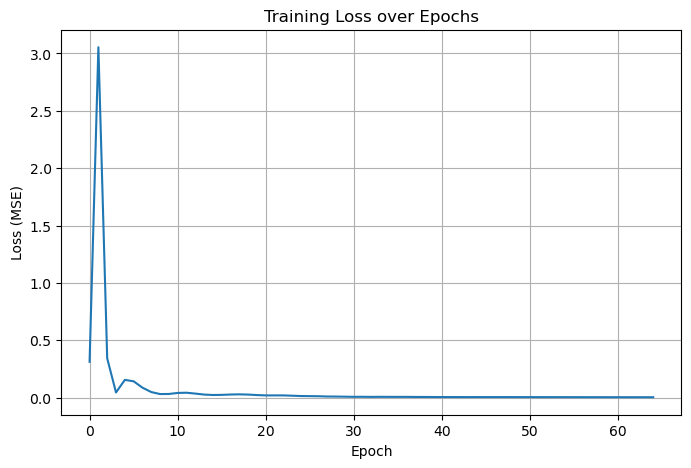

In [72]:
plt.figure(figsize=(8, 5))
plt.plot(regr.loss_curve_)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.grid(True)
plt.show()

In [77]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = regr.predict(X_train)
print("Train MSE:", mean_squared_error(y_train, y_pred))
print("Train R^2:", r2_score(y_train, y_pred))

Train MSE: 0.006213399293576555
Train R^2: 0.8334244467024493


Pretty good results with a low MSE and a high R^2. We want to see how it works on the test data though ...

In [ ]:
y_pred_test = regr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test R^2:", r2_score(y_test, y_pred_test))

Test MSE: 0.01741639923579234
Test R^2: 0.8074160289965768
Test MAE: 0.06887356113135465


Even better! We've done a good job at predicting GDP_PPP given the input features.

In [ ]:
#Lets transform the scaling and see the effects on our GDP_PPP prediction